## Keras Callbacks

In [36]:
from keras import models, layers, callbacks
from keras import optimizers, losses, preprocessing
from keras.models import Sequential
from keras.datasets import imdb 

import numpy as np
from myutils import *
import keras

### Developing a model from Keras IMDB data

In [4]:
num_features = 50000
max_len = 100

In [6]:
(train_x, train_y),(test_x, test_y) = imdb.load_data(num_words=num_features)
print(train_x.shape, train_y.shape)
print(test_x.shape, test_y.shape)

(25000,) (25000,)
(25000,) (25000,)


In [21]:
word_index = imdb.get_word_index()

In [27]:
len(word_index)

88584

In [24]:
print(max([len(x) for x in train_x]))
print(max([len(x) for x in test_x]))

2494
2315


In [25]:
# padding the data
train_x = preprocessing.sequence.pad_sequences(train_x, maxlen=max_len)
test_x = preprocessing.sequence.pad_sequences(test_x, maxlen=max_len)

In [29]:
train_y = np.asarray(train_y, dtype='float32')
test_y = np.asarray(test_y, dtype='float32')

In [26]:
print(max([len(x) for x in train_x]))
print(max([len(x) for x in test_x]))

100
100


### Fitting the model

In [31]:
model = models.Sequential()
model.add(layers.Embedding(num_features, 32))
model.add(layers.LSTM(32))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 32)          1600000   
_________________________________________________________________
lstm_1 (LSTM)                (None, 32)                8320      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 1,608,353
Trainable params: 1,608,353
Non-trainable params: 0
_________________________________________________________________


In [32]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

In [34]:
hist = model.fit(train_x, train_y, batch_size = 512, epochs=10, validation_data=(test_x, test_y))

Train on 25000 samples, validate on 25000 samples
Epoch 1/10
25000/25000 [==============================] - 12s 462us/step - loss: 0.3520 - acc: 0.8539 - val_loss: 0.4083 - val_acc: 0.8276
Epoch 2/10
25000/25000 [==============================] - 11s 458us/step - loss: 0.2732 - acc: 0.8940 - val_loss: 0.3645 - val_acc: 0.8457
Epoch 3/10
25000/25000 [==============================] - 12s 477us/step - loss: 0.2154 - acc: 0.9210 - val_loss: 0.4156 - val_acc: 0.8361
Epoch 4/10
25000/25000 [==============================] - 13s 513us/step - loss: 0.1783 - acc: 0.9356 - val_loss: 0.4312 - val_acc: 0.8302
Epoch 5/10
25000/25000 [==============================] - 13s 521us/step - loss: 0.1412 - acc: 0.9515 - val_loss: 0.4560 - val_acc: 0.8380
Epoch 6/10
25000/25000 [==============================] - 13s 507us/step - loss: 0.1204 - acc: 0.9603 - val_loss: 0.4905 - val_acc: 0.8230
Epoch 7/10
25000/25000 [==============================] - 13s 510us/step - loss: 0.0981 - acc: 0.9683 - val_loss: 0.

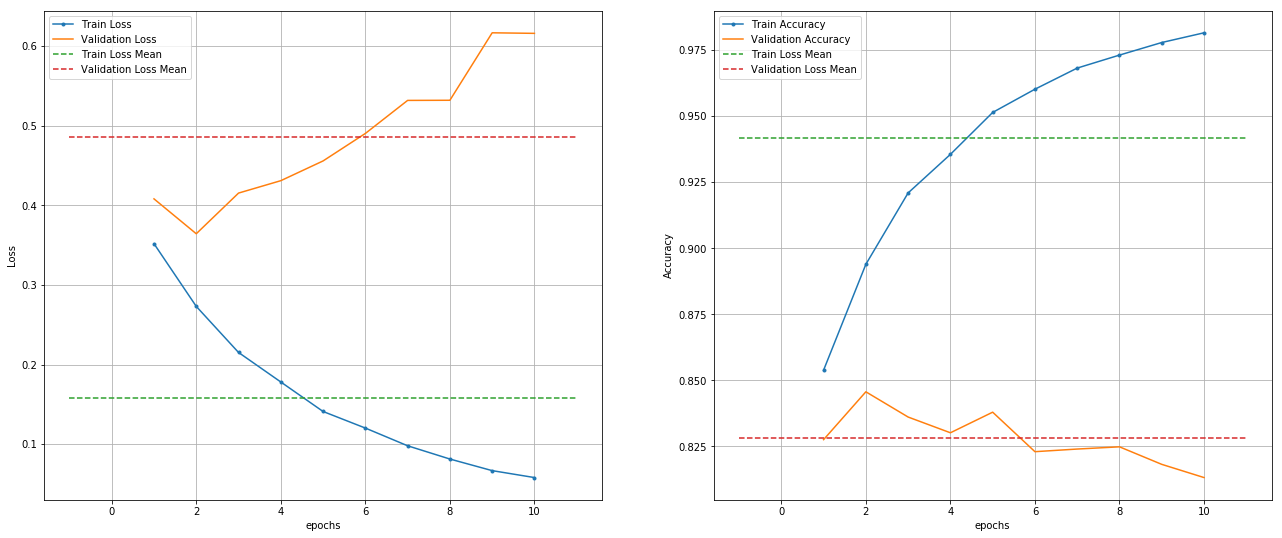

In [35]:
plot_keras_acc_ax(hist)